# IGH range research

This is a notebook to compare some not very usual bike gears, like internal geared hubs and Pinion gears.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [69]:
rohloff = np.array([0.279, 0.316, 0.360, 0.409, 0.464, 0.528, 0.600, 0.682, 0.774, 0.881, 1.000, 1.135, 1.292, 1.467]) # source: wikipedia
kindernay_xiv = np.geomspace(1, 5.43, 14)  # Exact ratios not known
p1_18 = np.array([0.55, 0.61, 0.68, 0.76, 0.84, 0.94, 1.05, 1.18, 1.32, 1.45, 1.61, 1.82, 2.04, 2.27, 2.50, 2.78, 3.13, 3.45]) #source: Cycle Monkey
c1_12 = np.array([0.55, 0.64, 0.76, 0.89, 1.05, 1.23, 1.45, 1.72, 2.04, 2.38, 2.78, 3.33]) #source: Cycle Monkey
c1_9xr = np.array([0.55, 0.68, 0.84, 1.05, 1.32, 1.61, 2.04, 2.50, 3.13]) #source: Cycle Monkey
alfine11 = np.array([0.527, 0.681, 0.770, 0.878, 0.995, 1.134, 1.292, 1.462, 1.667, 1.888, 2.153]) # source: Sheldon Brown
alfine8 = np.array([0.527, 0.644, 0.748, 0.851, 1.000, 1.223, 1.419, 1.615]) # source: Sheldon Brown
nexus7 = np.array([0.632, 0.741, 0.843, 0.989, 1.145, 1.335, 1.545]) # source: Sheldon Brown

In [66]:
gearboxes = {'P1.18': p1_18, 'C1.12': c1_12, 'C1.9xr': c1_9xr,
             'Kindernay XIV': kindernay_xiv, 'Rohloff': rohloff, 
             'Alfine 11': alfine11, 'Alfine 8': alfine8, 'Nexus 7': nexus7}

### Definitions of known gear comparision systems

From [https://www.sheldonbrown.com/gain.html]

#### Gear inches
the diameter of the drive wheel, times the size of the front sprocket divided by the size of the rear sprocket
The lowest gear on most mountain bikes is around 22-26 inches. The highest gear on road racing bikes is usually around 108-110 inches.

#### Development
Development can be calculated by dividing the chainwheel size by the rear sprocket size, multiplying the result by the wheel diameter and by pi (3.1416).

#### Some random comments
The 17.2” bottom gear may seem very low, but it will enable you to spin at “an easy to keep your balance” 48.5 rpm when climbing very steep hills at 4kph (2.5mph)
gear ratios (in inches) 26” wheels
Ring x sprocket
38 x 16 Rohloff 17.2 19.5 22.2 25.3 28.7 32.6 37.1 42.1 47.8 54.4 61.8 70.1 79.8 90.6
 typical modern MTB set up, 22/32/44 chain rings and 11-34 cassette frequently recommended for use on expedition bikes (and many fast touring 26” wheel bikes)
16.8 19.1 22 24.9 27.7** 32 36.2 41.6 48.9 55.5 64** 67.3 76.3 88 104

Cycle Monkey secondary gear ratios for Pinion:
0.95 - 1.2 Mountian, fat, heavy off-road touring
1.05 - 1.25 off-road bikepacking
1.1 - 1.3 on-road touring
1.2 - 1.4 on-road bikepacking, commuting, gravel riding
1.3 - 1.5 road, faster/more fit gravel rider

In [27]:
def development(chainwheel, rear, gear, wheel_diameter):
    """
    Calculate development given bike parameters:
        chainwheel - chainwheel (front) sporket size
        rear - rear sporket size
        gear - gear coefficient of rear hub or crankshaft gear
        wheel_diameter - wheel diameter in mm 
    """
    return np.pi * wheel_diameter * gear * chainwheel / rear

def gear_inches(chainwheel, rear, gear, wheel_diameter):
    """
    Calculate gear inches given bike parameters:
        chainwheel - chainwheel (front) sporket size
        rear - rear sporket size
        gear - gear coefficient of rear hub or crankshaft gear
        wheel_diameter - wheel diameter in mm
    """
    return wheel_diameter * gear * chainwheel / 2.54 

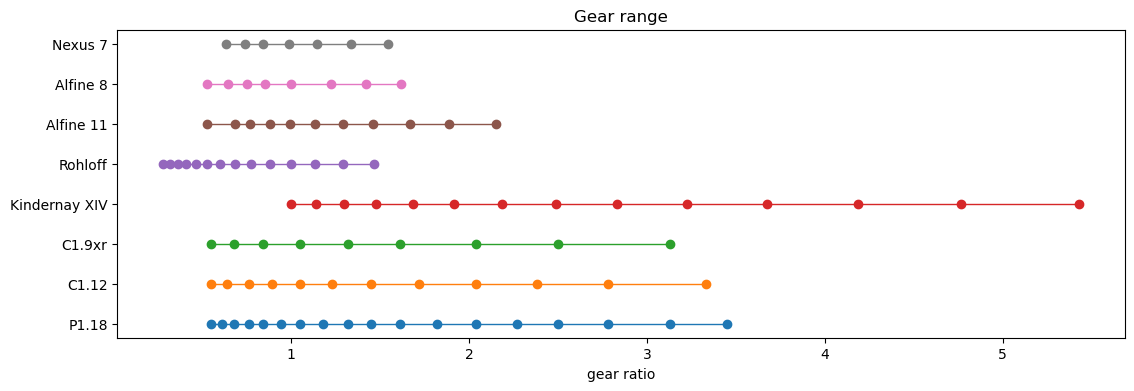

In [67]:
fig, ax = plt.subplots(figsize=(13, 4))
ax.set_title('Gear range')
for i, gear_name in enumerate(gearboxes):
    gears = gearboxes[gear_name]
    ax.plot(gears, [i]*len(gears), lw=1, marker='o', label=gear_name)
ax.set_xlabel('gear ratio')
_ = ax.set_yticks(np.arange(len(gearboxes)), gearboxes.keys())

* Rohloff uses a gear range quite different from all the rest. Not very surprising considering it got gear ratio of 1 at gear 11... It should result in quite different chainwheel/rear sporket configurations.
* The initial comparision can be improved by normalizing all graphs to start from 1, so let's do it.

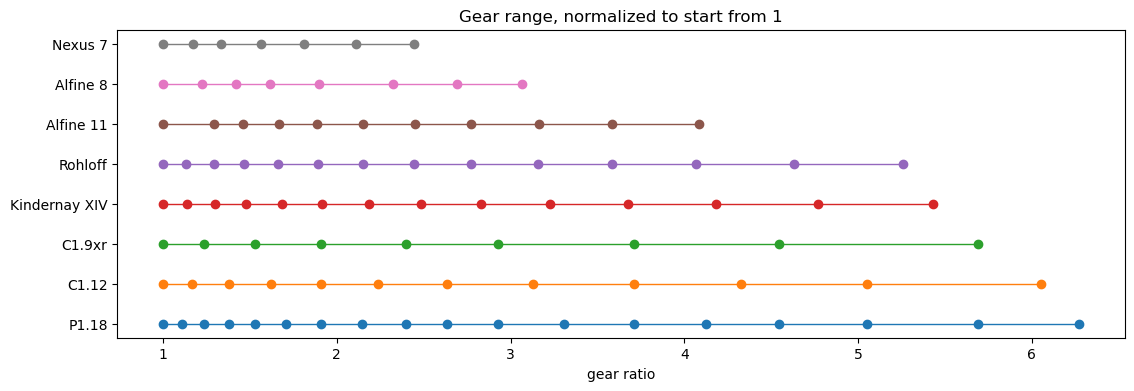

In [68]:
fig, ax = plt.subplots(figsize=(13, 4))
ax.set_title('Gear range, normalized to start from 1')
for i, gear_name in enumerate(gearboxes):
    gears = gearboxes[gear_name]
    ax.plot(gears/gears[0], [i]*len(gears), lw=1, marker='o', label=gear_name)
ax.set_xlabel('gear ratio')
_ = ax.set_yticks(np.arange(len(gearboxes)), gearboxes.keys())

* C1.9xr has reeaaly large gear steps. Considering low price difference with C1.12 it is really no point using C1.9xr on [non-electric] bike.
* Gear steps of C1.12 are still quite large comparing to the rest. Huge range and only 12 gears.
* Kindernay XIV is an improved version of Rohloff.
* Range of Nexus 7 (available on many city/hybrid bikes) are really low, Alfine/Nexus 8 is better, but not that much.
* Alfine 11 is really Rohloff minus gears 2, 13 and 14.
* High first step on Alfine 11 is like 'ok, you can go up this hill if you really want, but maybe not with the the most comfortable setting'. I'm fine with this, at least in theory ;)
* Alfine 11 looks to be a really good option for the money. It covers 12 of 14 Rohloff gears for ~1000€ less. At least if one consider gear range only.